In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8,  rc={"lines.linewidth": 3})
sns.set_palette(sns.color_palette("deep"))

#### Auxiliar function for building animation for function

In [31]:
def animate2D(i,func,t0,dt,line,title):
    #Get list of t points up to ith time:
    tf = t0+dt*(i+1)
    xpts = line.get_data()[0]
    ypts = func(t=tf,x=xpts)

    if title:
        title.set_text(r't = %1.1f s' %(tf))
    
    line.set_data(xpts,ypts)
        
    return (line,)


def setupFig(func,t0,xpts):
    ypts = func(t=t0,x=xpts)
    xmin,xmax = min(xpts),max(xpts)
    ymin,ymax = min(ypts),max(ypts)
    ymin,ymax = -2,2
    color = sns.color_palette("deep",3)
    fig = plt.figure(figsize=(6,4))
    ax1 = plt.subplot(111)
    ax1.set_xlim(xmin,xmax)
    ax1.set_ylim(ymin,ymax)
    ax1.set_xlabel(r'$x$ (m)')
    ax1.set_ylabel(r'$\phi$')

    title = ax1.set_title("t = %1.1f" %t0)
    
    #Plot function
    line, = ax1.plot(xpts,ypts,'-',alpha=0.9,c=color[2])
    
    plt.tight_layout()
    
    return fig,line,title

### Onda plana

In [13]:
@np.vectorize
def E(t,x,w,k,phi=0.0):
    return np.cos(k*(x+phi)-w*t)

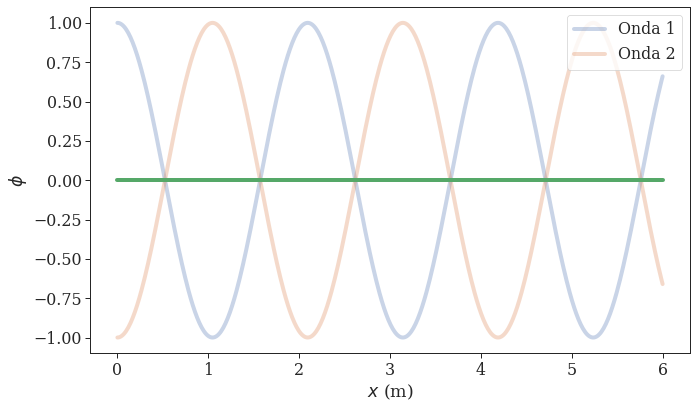

In [21]:
#Constantes em unidades arbitrárias:
w = 2 #frequencia angular
k = 3 #numero de onda

phi1 = 0.0
phi2 = np.pi/k
#Condicoes iniciais:
t0 = 0
xpts = np.linspace(0,6,500)
E_sol = E(t=t0,x=xpts,w=w,k=k,phi=phi1)
E_sol2 = E(t=t0,x=xpts,w=w,k=k,phi=phi2)
fig = plt.figure(figsize=(10,6))
plt.plot(xpts,E_sol,label='Onda 1',alpha=0.3,linewidth=4)
plt.plot(xpts,E_sol2,label=r'Onda 2',alpha=0.3,linewidth=4)
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$\phi$')
plt.legend()
plt.tight_layout()
plt.savefig('ondaInterferenciaDest.png')
plt.plot(xpts,E_sol+E_sol2,label=r'Onda Total',alpha=1.0,linewidth=4)
plt.savefig('ondaInterferenciaDest_tot.png')
plt.show()

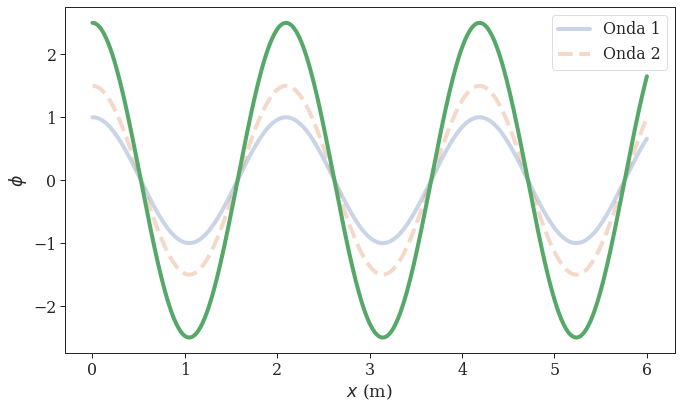

In [20]:
#Constantes em unidades arbitrárias:
w = 2 #frequencia angular
k = 3 #numero de onda

phi1 = 0.0
phi2 = 2*np.pi/k
#Condicoes iniciais:
t0 = 0
xpts = np.linspace(0,6,500)
E_sol = E(t=t0,x=xpts,w=w,k=k,phi=phi1)
E_sol2 = 1.5*E(t=t0,x=xpts,w=w,k=k,phi=phi2)
fig = plt.figure(figsize=(10,6))
plt.plot(xpts,E_sol,label='Onda 1',alpha=0.3,linewidth=4)
plt.plot(xpts,E_sol2,label=r'Onda 2',alpha=0.3,linewidth=4,linestyle='--')
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$\phi$')
plt.legend()
plt.tight_layout()
plt.savefig('ondaInterferenciaConst.png')
plt.plot(xpts,E_sol+E_sol2,label=r'Onda Total',alpha=1.0,linewidth=4)
plt.savefig('ondaInterferenciaConst_tot.png')
plt.show()

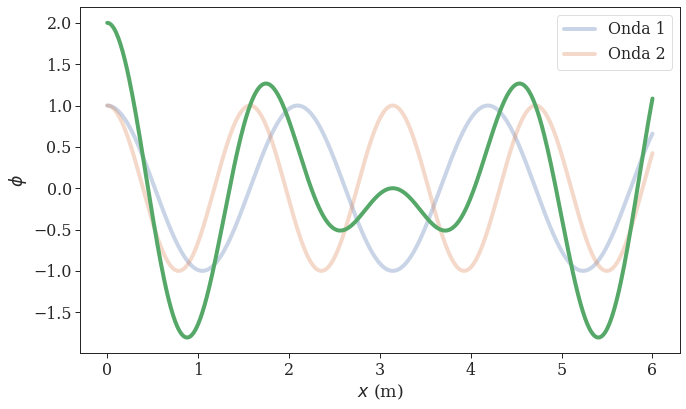

In [22]:
#Constantes em unidades arbitrárias:
w1 = 2 #frequencia angular
k1 = 3 #numero de onda

w2 = 2 #frequencia angular
k2 = 4 #numero de onda

#Condicoes iniciais:
t0 = 0
xpts = np.linspace(0,6,500)
E_sol = E(t=t0,x=xpts,w=w1,k=k1)
E_sol2 = E(t=t0,x=xpts,w=w2,k=k2)
fig = plt.figure(figsize=(10,6))
plt.plot(xpts,E_sol,label='Onda 1',alpha=0.3,linewidth=4)
plt.plot(xpts,E_sol2,label=r'Onda 2',alpha=0.3,linewidth=4)
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$\phi$')
plt.legend()
plt.tight_layout()
plt.savefig('ondaInterferencia.png')
plt.plot(xpts,E_sol+E_sol2,label=r'Onda Total',alpha=1.0,linewidth=4)
plt.savefig('ondaInterferencia_tot.png')
plt.show()

In [32]:
#Set up plot
ondaTotal = lambda t,x: E(t=t,x=x,w=w1,k=k1)+E(t=t,x=x,w=w2,k=k2)


t0,tmax = 0.0,30
xpts = np.linspace(0,10,500)
fig,line,title = setupFig(ondaTotal,t0,xpts)
#Define time step:
dt = (tmax-t0)/300.
#Define real time step:
interval = 20

anim = animation.FuncAnimation(fig, animate2D,
                               frames=int((tmax-t0)/dt), interval=interval, 
                               blit=True, fargs=(ondaTotal,t0,dt,line,title))
plt.close()
anim


In [ ]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='AL'), bitrate=1800)
anim.save('interferingWave1.mp4', writer=writer)